# Estimating deforestation in the Amazon

The goal is to estimate the fraction of the Amazon rainforest lost between 2000 and 2015. The data contains gold-standard deforestation labels for parcels that were collected through field visits (1), as well as predictions of forest cover based on applying computer vision to satellite imagery (2).

1. E. L. Bullock, C. E. Woodcock, C. Souza Jr, P. Olofsson, Satellite‐based estimates reveal widespread forest degradation in the Amazon. Global Change Biology 26(5), 2956–2969 (2020).
2. J. O. Sexton, J. X-P. Song, M. Feng, P. Noojipady, A. Anand, C. Huang, D-H. Kim, K. M. Collins, S. Channan, C. DiMiceli, J. R. Townshend, Global, 30-m resolution continuous fields of tree cover: Landsat-based rescaling of MODIS vegetation continuous fields with lidar-based estimates of error. International Journal of Digital Earth 6(5), 427–448 (2013).

### Import necessary packages

In [1]:
import numpy as np
from ppi_py.datasets import load_dataset
from ppi_py import analyze_dataset, plot_cpp

Split 1: Y range from 0.12548173178981886 to 0.04103236491033855
Split 2: Y range from 0.19856338914957036 to 0.04195711217843751
Split 3: Y range from 0.1384005849368402 to 0.030059419530664985
Split 4: Y range from 0.030059419530664985 to 0.09651032488754442
Split 5: Y range from 0.09651032488754442 to 0.9793256632037612
分组： 1
带标签的样本量： 6
不带标签的样本量： 314
分组： 2
带标签的样本量： 6
不带标签的样本量： 313
分组： 3
带标签的样本量： 6
不带标签的样本量： 313
分组： 4
带标签的样本量： 6
不带标签的样本量： 313
分组： 5
带标签的样本量： 6
不带标签的样本量： 313
imputed var: [1.47471324e-05]
rectifier var [0.00317962]
带标签的样本量： 30
不带标签的样本量： 1566

最终结果：
真实 theta: 0.15162907268170425
CPP intervals: [array([-0.11887665,  0.47184461]), array([0.03624319, 0.21059137]), array([-0.10872606,  0.2188642 ]), array([-1.69192756e-07,  2.52260634e-07]), array([0.0999246 , 0.90007691])]
组合数据的置信区间: [0.0799673  0.31225521]
联邦聚合后的置信区间: [0.06022304 0.28177229]
Updated CSV file 'parameters.csv' successfully.


meta NOT subset; don't know how to subset; dropped


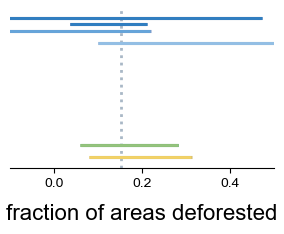

In [2]:
# 示例调用
dataset_name = "forest"
data = load_dataset('./data/', dataset_name)
Y_total = data["Y"]
Yhat_total = data["Yhat"]

alpha = 0.05

method = "mean"

# dataset_dist = 'IID'
dataset_dist = 'Non-IID'

# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_ratio = [1, 1, 1, 1, 1]  # 数据量分布平衡
# num_ratio = [1,2,3,4,5]  # 数据量分布不平衡
# num_ratio = [5,4,3,2,1]  # 数据量分布不平衡

# 计算标注真实值、各节点上、组合数据后和FL后的平均值cpp
true_theta, cpp_intervals, ppi_ci_combined, mean_cpp = analyze_dataset(alpha, None, Y_total, Yhat_total, dataset_dist,
                                                                            num_ratio, method, grid=None)
# 画图
file_name = dataset_dist + '-' + dataset_name + '.pdf'
xlim = [-0.1, 0.5]
ylim = [0, 1.0]
title = "fraction of areas deforested"
plot_cpp(true_theta, cpp_intervals, ppi_ci_combined, mean_cpp, file_name, xlim, ylim, title)